In [98]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style("darkgrid")
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import random

import sys
import os

import warnings
warnings.filterwarnings('ignore')


#Función para sacar outliers
#(se puede cambiar eso de s-s.mean <= etc, esa es una forma posible de detectar outliers)

def mascara_outliers(s, mult):
    return abs(s - s.mean()) <= mult*s.std()

def sacar_outliers(datos,tag,mult):
    mascara = mascara_outliers(datos[tag], mult)
    return datos[mascara]


#Función para delimitar ejes:
#(dice dominio, pero se puede usar para imagen también... ya se que esta medio cabeza, pero anda bien)

def mascara_dominio_abajo(s,x0):
    return x0 <= s
def mascara_dominio_arriba(s,x1):
    return s <= x1

def achicar_dominio(datos,tag,x0,x1):
    mascara = mascara_dominio_abajo(datos[tag],x0)
    datos = datos[mascara]
    mascara = mascara_dominio_arriba(datos[tag],x1)
    return datos[mascara]


#Función para crear una columna con cada año
#(es imrpotante haber cargado el csv con el arguemtno parse_dates=[tag])
def crear_col_años(datos,tag):
    return datos[tag].apply (lambda x : x.year if x.month <= 12 else x.year + 1)


#Graficadores

def graficador(data, tagX, tagY, title, labelX, labelY, interp, col):
    ax = sns.tsplot(data=data[tagY], time=data[tagX], interpolate=interp, color=col)
    sns.plt.title(title)
    sns.plt.xlabel(labelX)
    sns.plt.ylabel(labelY)

def mostrar():
    sns.plt.show()
    sns.plt.close()


#Auxiliares

def descripcion(datos):
    print(datos.describe())

def ver_filas(datos, fil):
    print(datos.head(fil))

0 agentesVariados_conPodaFuturo
1 agentesVariados_conPodaMax
2 agentesVariados_conPodas
3 agentesVariados_sinPodas
4 cerosVariados_conPodaFuturo
5 cerosVariados_conPodas
6 cerosVariados_sinPodas
7 votosVariados_conPodaFuturo
8 votosVariados_conPodaMax
9 votosVariados_conPodas
10 votosVariados_sinPodas


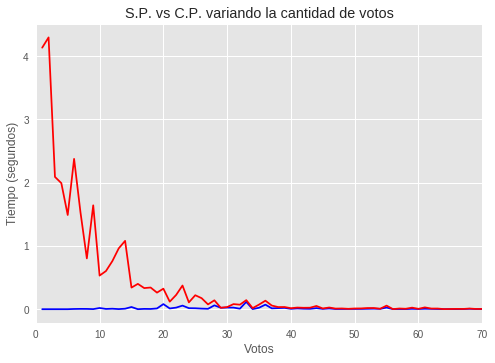

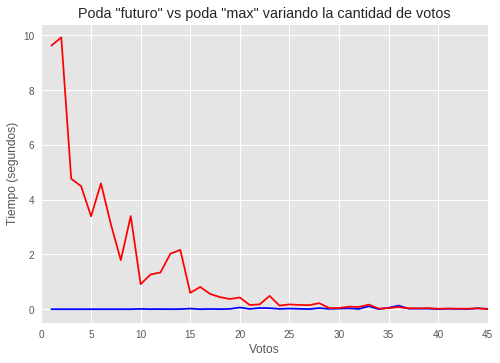

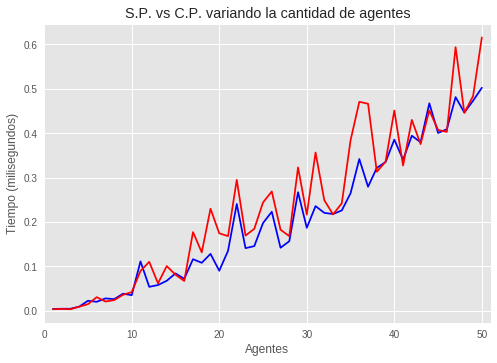

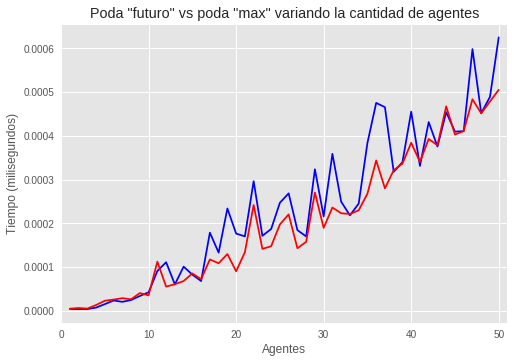

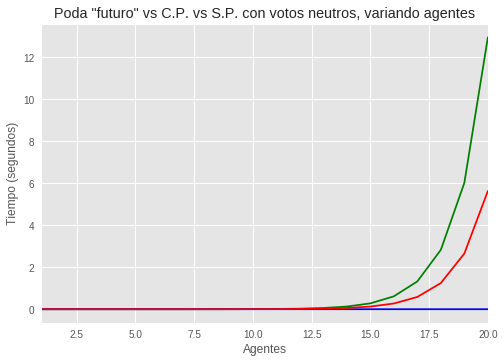

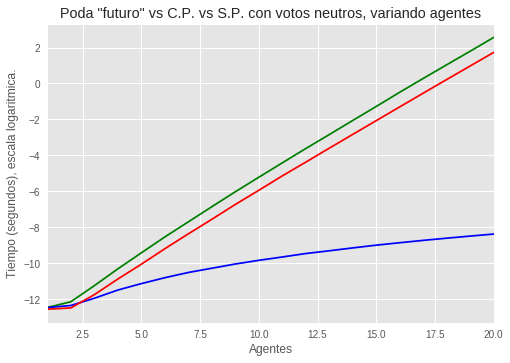

In [105]:

################################
# Levanto los datos, y los veo #
################################

df_todos = []
df_nombres = []
for filename in sorted(os.listdir('./')):
    primero = True
    if not('ipynb' in filename):
        df_nombres.append(filename)
        for res in os.listdir('./'+str(filename)):
            df_actual = pd.read_csv('./'+str(filename)+'/'+str(res))
            if primero:
                primero = False
                df_todos.append(df_actual)
            else:
                df_todos[-1]['tiempo'] = df_todos[-1]['tiempo'] + df_actual['tiempo']

for i in range(0,len(df_todos)):
    df_todos[i]['tiempo'] = (df_todos[i]['tiempo'] / 100) #si se quiere reajustar la medida, hacerlo dentro de gráficos

for i in range(0,len(df_nombres)):
    print(str(i) + ' ' + str(df_nombres[i]))


    
#####################
# Hago los gráficos #
#####################
#graficador(data, tagX, tadY, title, labelX, labelY, interp, col)

#10 votosVariados_sinPodas (ROJO) vs 9 votosVariados_conPodas (AZUL)
graficador(df_todos[9], 'votos', 'tiempo', 'S.P. vs C.P. variando la cantidad de votos', 'Votos', 'Tiempo (segundos)', True, 'b')
graficador(df_todos[10], 'votos', 'tiempo', 'S.P. vs C.P. variando la cantidad de votos', 'Votos', 'Tiempo (segundos)', True, 'r')
sns.plt.xlim((0,70))
mostrar()

#7 votosVariados_conPodaFuturo (ROJO) vs 8 votosVariados_conPodaMax (AZUL)
graficador(df_todos[8], 'votos', 'tiempo', 'Poda "futuro" vs poda "max" variando la cantidad de votos', 'Votos', 'Tiempo (segundos)', True, 'b')
graficador(df_todos[7], 'votos', 'tiempo', 'Poda "futuro" vs poda "max" variando la cantidad de votos', 'Votos', 'Tiempo (segundos)', True, 'r')
sns.plt.xlim((0,45))
mostrar()

#3 agentesVariados_sinPodas (ROJO) vs 2 agentesVariados_conPodas (AZUL)
df_todos[3]['tiempo'] = df_todos[3]['tiempo']*1000
df_todos[2]['tiempo'] = df_todos[2]['tiempo']*1000
graficador(df_todos[2], 'agentes', 'tiempo', 'S.P. vs C.P. variando la cantidad de agentes', 'Agentes', 'Tiempo (milisegundos)', True, 'b')
graficador(df_todos[3], 'agentes', 'tiempo', 'S.P. vs C.P. variando la cantidad de agentes', 'Agentes', 'Tiempo (milisegundos)', True, 'r')
sns.plt.xlim((0,51))
mostrar()

#0 agentesVariados_conPodaFuturo (ROJO) vs 1 agentesVariados_conPodaMax (AZUL)
df_todos[3]['tiempo'] = df_todos[3]['tiempo']*1000
df_todos[2]['tiempo'] = df_todos[2]['tiempo']*1000
graficador(df_todos[1], 'agentes', 'tiempo', 'S.P. vs C.P. variando la cantidad de agentes', 'Agentes', 'Tiempo (milisegundos)', True, 'b')
graficador(df_todos[0], 'agentes', 'tiempo', 'Poda "futuro" vs poda "max" variando la cantidad de agentes', 'Agentes', 'Tiempo (milisegundos)', True, 'r')
sns.plt.xlim((0,51))
mostrar()


#4 cerosVariados_conPodaFuturo (VERDE) vs 5 cerosVariados_conPodas (AZUL) vs 6 cerosVariados_sinPodas (ROJO)
graficador(df_todos[4], 'agentes', 'tiempo', 'Poda "futuro" vs C.P. vs S.P. con votos neutros, variando agentes', 'Agentes', 'Tiempo (segundos)', True, 'g')
graficador(df_todos[5], 'agentes', 'tiempo', 'Poda "futuro" vs C.P. vs S.P. con votos neutros, variando agentes', 'Agentes', 'Tiempo (segundos)', True, 'b')
graficador(df_todos[6], 'agentes', 'tiempo', 'Poda "futuro" vs C.P. vs S.P. con votos neutros, variando agentes', 'Agentes', 'Tiempo (segundos)', True, 'r')
#sns.plt.xlim((0,45))
mostrar()


#4 cerosVariados_conPodaFuturo (VERDE) vs 5 cerosVariados_conPodas (AZUL) vs 6 cerosVariados_sinPodas (ROJO)
df_todos[4]['tiempo'] = np.log(df_todos[4]['tiempo'])
df_todos[5]['tiempo'] = np.log(df_todos[5]['tiempo'])
df_todos[6]['tiempo'] = np.log(df_todos[6]['tiempo'])
graficador(df_todos[4], 'agentes', 'tiempo', 'Poda "futuro" vs C.P. vs S.P. con votos neutros, variando agentes', 'Agentes', 'Tiempo (segundos), escala logaritmica.', True, 'g')
graficador(df_todos[5], 'agentes', 'tiempo', 'Poda "futuro" vs C.P. vs S.P. con votos neutros, variando agentes', 'Agentes', 'Tiempo (segundos), escala logaritmica.', True, 'b')
graficador(df_todos[6], 'agentes', 'tiempo', 'Poda "futuro" vs C.P. vs S.P. con votos neutros, variando agentes', 'Agentes', 'Tiempo (segundos), escala logaritmica.', True, 'r')
#sns.plt.xlim((0,45))
mostrar()